   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1
X_train shape:  (309, 10)
X_test shape:  (153, 10)
Y_train shape:  (309,)
Y_test shape:  (153,)
number of y equal to -1:  302
number of y equal to 1:  

/Users/rashmisharma/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


160


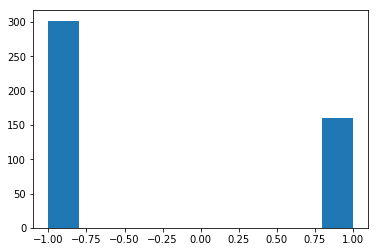

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline
data = pd.read_csv("heart.csv")

print data.head()

# 1. convert famhist data from string to category number. 
data.famhist = pd.Categorical(data.famhist).codes

# 2. change 0,1 lable to -1 1 lable
data.chd = 2* data.chd - 1 

# 3.1 make desing matrix x
x = data.ix[:,:-1]
min_max_scaler = preprocessing.MinMaxScaler()
# 3.2 scale so that it can fit better 
x = min_max_scaler.fit_transform(x)
# 3.3 add 1 in the first column to account for the bias. 
x = np.c_[np.repeat(1,len(x)), x]

# 4. make Y
y = np.array(data.ix[:,9])

# 5. train test split 
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=42)
print "X_train shape: ", X_train.shape
print "X_test shape: ", X_test.shape
print "Y_train shape: ", y_train.shape
print "Y_test shape: ", y_test.shape

# 6. see how many are -1, and 1
plt.hist(y)
print "number of y equal to -1: ", np.sum(y == -1)
print "number of y equal to 1: ",np.sum(y == 1)

20.226
18.2934
16.5531
14.9859
13.5747
12.3039
11.1594
10.1289
9.20087
8.36516
7.61258
6.93487
6.32458
5.77499
5.28006
4.83436
4.43299
4.07154
3.74603
3.45288
3.18889
2.95114
2.73703
2.54421
2.37055
2.21415
2.07329
1.94642
1.83216
1.72925
1.63656
1.55307
1.47786
1.41013
1.34911
1.29414
1.24462
1.20001
1.15982
1.12361
1.09098
1.06158
1.03508
1.01121
0.989685
0.970286
0.952799
0.937033
0.922816
0.909996
0.898432
0.888001
0.878589
0.870095
0.862428
0.855506
0.849254
0.843607
0.838503
0.833889
0.829717
0.825942
0.822525
0.819431
0.816627
0.814084
0.811778
0.809683
0.80778
0.806049
0.804473
0.803038
0.801728
0.800532
0.799438
0.798437
0.797518
0.796675
0.795899
0.795184
0.794524
0.793913
0.793347
0.792822
0.792333
0.791876
0.791449
0.791049
0.790674
0.79032
0.789985
0.789669
0.789369
0.789083
0.78881
0.78855
0.7883
0.78806
0.787829
0.787606
0.787391
0.787182
0.786979
0.786782
0.78659
0.786402
0.786219
0.786039
0.785863
0.785691
0.785521
0.785354
0.78519
0.785027
0.784867
0.784709
0.784554
0

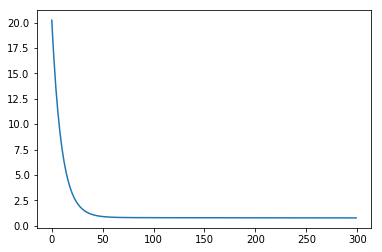

In [8]:
# 7. multiple regression 

initial_weights = np.expand_dims( np.repeat(1,X_train.shape[1]), axis = 1)
W = tf.Variable(initial_weights, dtype=tf.float32, name = "W")
x_ = tf.placeholder(dtype=tf.float32, shape=(None,X_train.shape[1]) )

y = tf.squeeze(tf.matmul(x_, W), axis =1 )  # the squeeze has been added because the final output must be a vector.  
y_ = tf.placeholder(dtype=tf.float32, shape= (None,))     # the shape is a vector. (10,)

loss = tf.reduce_mean( tf.square( y  - y_) )
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
W_list= []
loss_list =[]

for i in xrange(300):
    sess.run(train, feed_dict={x_: X_train, y_: y_train})
    W_list.append(sess.run(W))
    l=sess.run(loss, feed_dict={x_:X_train, y_:y_train})
    print l
    loss_list.append(l)


# 8. diagnosis 
# plot the loss
plt.plot(loss_list)  # see how loss converged

Correct in training set :  0.699029126214
Correct in test set:  0.705882352941


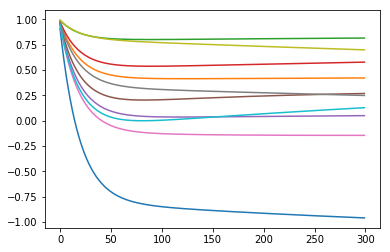

In [9]:
# plot the weights 
W_ = [np.squeeze(item) for item in W_list]
plt.plot(W_)  # see how weights converged

# in sample prediction accuracy
train_prediction = sess.run(y, feed_dict={x_:X_train, y_: y_train})
print "Correct in training set : ", np.mean(y_train == np.sign(train_prediction))   # about 70% accurate in sample .
# test set prediction accuracy 
test_prediction = sess.run(y, feed_dict={x_:X_test, y_:y_test})
print "Correct in test set: ", np.mean(y_test == np.sign(test_prediction))  # about 70% so no overfit. 

sess.close()